In [1]:
import gensim
gensim.__version__ # Word2Vec 을 지원하는 패키지

'4.3.3'

In [3]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 39.7 MB/s eta 0:00:00


# 영어 Word2Vec

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x793f7024cc50>)

In [6]:
# XML 데이터 전처리 필요

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져오기
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용한 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [7]:
print("총 샘플의 개수: {}".format(len(result)))

총 샘플의 개수: 273424


In [8]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


# Word2Vec 훈련시키기

Word2Vec 하이퍼파라미터<br>
- vector_size: 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window: 컨텍스트 윈도우 크기
- min_count: 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers: 학습을 위한 프로세스 수
- sg: 0은 CBOW, 1은 Skip-gram

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [10]:
# Word2Vec의 유사 단어 찾기 기능
model_result = model.wv.most_similar("man")
print(model_result)

#! 단어의 유사도를 계산 할 수 있게 되었다!

[('woman', 0.8425382375717163), ('guy', 0.8041871786117554), ('lady', 0.7789592146873474), ('boy', 0.7486630082130432), ('soldier', 0.7327619194984436), ('girl', 0.7267593145370483), ('gentleman', 0.7204879522323608), ('kid', 0.693535566329956), ('surgeon', 0.6667233109474182), ('rabbi', 0.6615429520606995)]


# Word2Vec 모델 저장하고 로드하기

In [11]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [12]:
# 로드한 모델 사용해보기
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8425382375717163), ('guy', 0.8041871786117554), ('lady', 0.7789592146873474), ('boy', 0.7486630082130432), ('soldier', 0.7327619194984436), ('girl', 0.7267593145370483), ('gentleman', 0.7204879522323608), ('kid', 0.693535566329956), ('surgeon', 0.6667233109474182), ('rabbi', 0.6615429520606995)]


# 한국어 Word2Vec 만들기 (네이버 영화 리뷰)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [5]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7da7b4ba2650>)

In [6]:
train_data = pd.read_table('ratings.txt') # 리뷰 데이터 로드
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [7]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [8]:
# Null 값 존재 유무
print(train_data.isnull().values.any())

True


In [9]:
# Null 값 제거
train_data = train_data.dropna(how='any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값 존재 유무
print(len(train_data)) # 리뷰 개수 출력

False
199992


In [10]:
# 한글이 아닌 경우 제거하는 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", regex=True)
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [11]:
# 불용어 제거

# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '강', '괴', '도', '를', '으로', '자', '에', '와', '한', '하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [1:21:16<00:00, 41.01it/s]


리뷰의 최대 길이:  68
리뷰의 평균 길이:  10.712713508540341


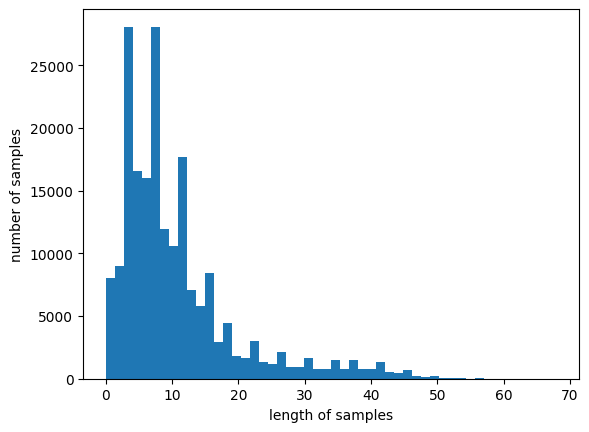

In [13]:
# 리뷰 길이 분포 확인
print("리뷰의 최대 길이: ", max(len(review) for review in tokenized_data))
print("리뷰의 평균 길이: ", sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

In [14]:
# Word2Vec으로 토큰화 된 리뷰데이터를 학습

from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [15]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape
# 16,477개의 단어, 100차원(vector_size)

(17947, 100)

In [16]:
# 유사도 테스트
print(model.wv.most_similar("최민식"))
print(model.wv.most_similar("히어로"))

[('이정재', 0.87112957239151), ('안성기', 0.8625171184539795), ('오달수', 0.862406849861145), ('한석규', 0.8583703637123108), ('설경구', 0.8573735356330872), ('정재영', 0.854640781879425), ('박중훈', 0.8532028794288635), ('서영희', 0.8482444286346436), ('양동근', 0.8456055521965027), ('김명민', 0.8430371880531311)]
[('느와르', 0.8224074244499207), ('무협', 0.7996680736541748), ('호러', 0.7955605983734131), ('무비', 0.7932350039482117), ('슬래셔', 0.778565526008606), ('재난영화', 0.7757799029350281), ('멜로', 0.7653586268424988), ('블록버스터', 0.7652907371520996), ('홍콩', 0.7617759704589844), ('정통', 0.7574677467346191)]


# 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개

구글 제공 사전 훈련된 Word2Vec 모델 사용<br>
경로: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit<br>
임베딩 벡터 차원: 300

In [22]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
#urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", filename="GoogleNews-vectors-negative300.bin.gz")
#word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

#word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

import gensim.downloader as api

word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [23]:
# 모델 크기 확인
print(word2vec_model.vectors.shape)

(3000000, 300)


모델 사이즈<br>
3 million words * 300 features * 4bytes/feature = ~3.35GB

In [24]:
# 사전 훈련된 임베딩을 사용하여 두 단어의 유사도 계산
print(word2vec_model.similarity("this", "is"))
print(word2vec_model.similarity("post", "book"))

0.40797034
0.057204384


In [25]:
# 특정 단어의 벡터 출력
print(word2vec_model["book"])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04